# Investigation of more datapoints influnce on accuracy for aluminium dataset

JSMS + DaBef dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from numpy.polynomial.polynomial import Polynomial
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import CubicSpline
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct, Matern
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Example Usage:
models = ['RF', 'NN']
data_points = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]  # Increasing number of data points
mae_scores = [[21.56, 21.16, 19.96, 19.64, 16.86, 15.67, 14.51,  14.37, 14.69, 14.53, 14.69, 13.47, 14.27, 13.25, 13.15, 13.48, 13.73, 13.86, 13.69, 13.19, 13.21],  [23.55, 22.27, 20.35, 19.17, 18.12, 17.98, 16.72, 15.78, 13.56, 12.14, 12.67, 12.16, 13.28, 13.08, 11.60, 12.54, 11.36, 11.34, 11.85, 11.54, 11.7]]
r2_scores =  [[0.45, 0.50,  0.55, 0.56,  0.59,  0.68, 0.67, 0.69, 0.71, 0.73,  0.71, 0.74, 0.71, 0.72,  0.74,  0.73,  0.75, 0.74,  0.74, 0.77,  0.76],         [0.4,  0.43, 0.46, 0.5, 0.55,  0.58, 0.62,  0.65, 0.70, 0.74,  0.77, 0.79, 0.78, 0.779,  0.8,   0.81,   0.82, 0.82, 0.82, 0.83, 0.83]]

#nll_scores = [[0.35, 0.34, 0.33, 0.32, 0.31, 0.30], [0.40, 0.39, 0.38, 0.37, 0.36, 0.35], [0.45, 0.44, 0.43, 0.42, 0.41, 0.40]]

metrics = [mae_scores, r2_scores] # , nll_scores
metric_names = ['MAE', 'R² Score'] # , 'NLL'



C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_19252\2056276806.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))
C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_19252\2056276806.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))
c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn

<Figure size 1400x1200 with 0 Axes>

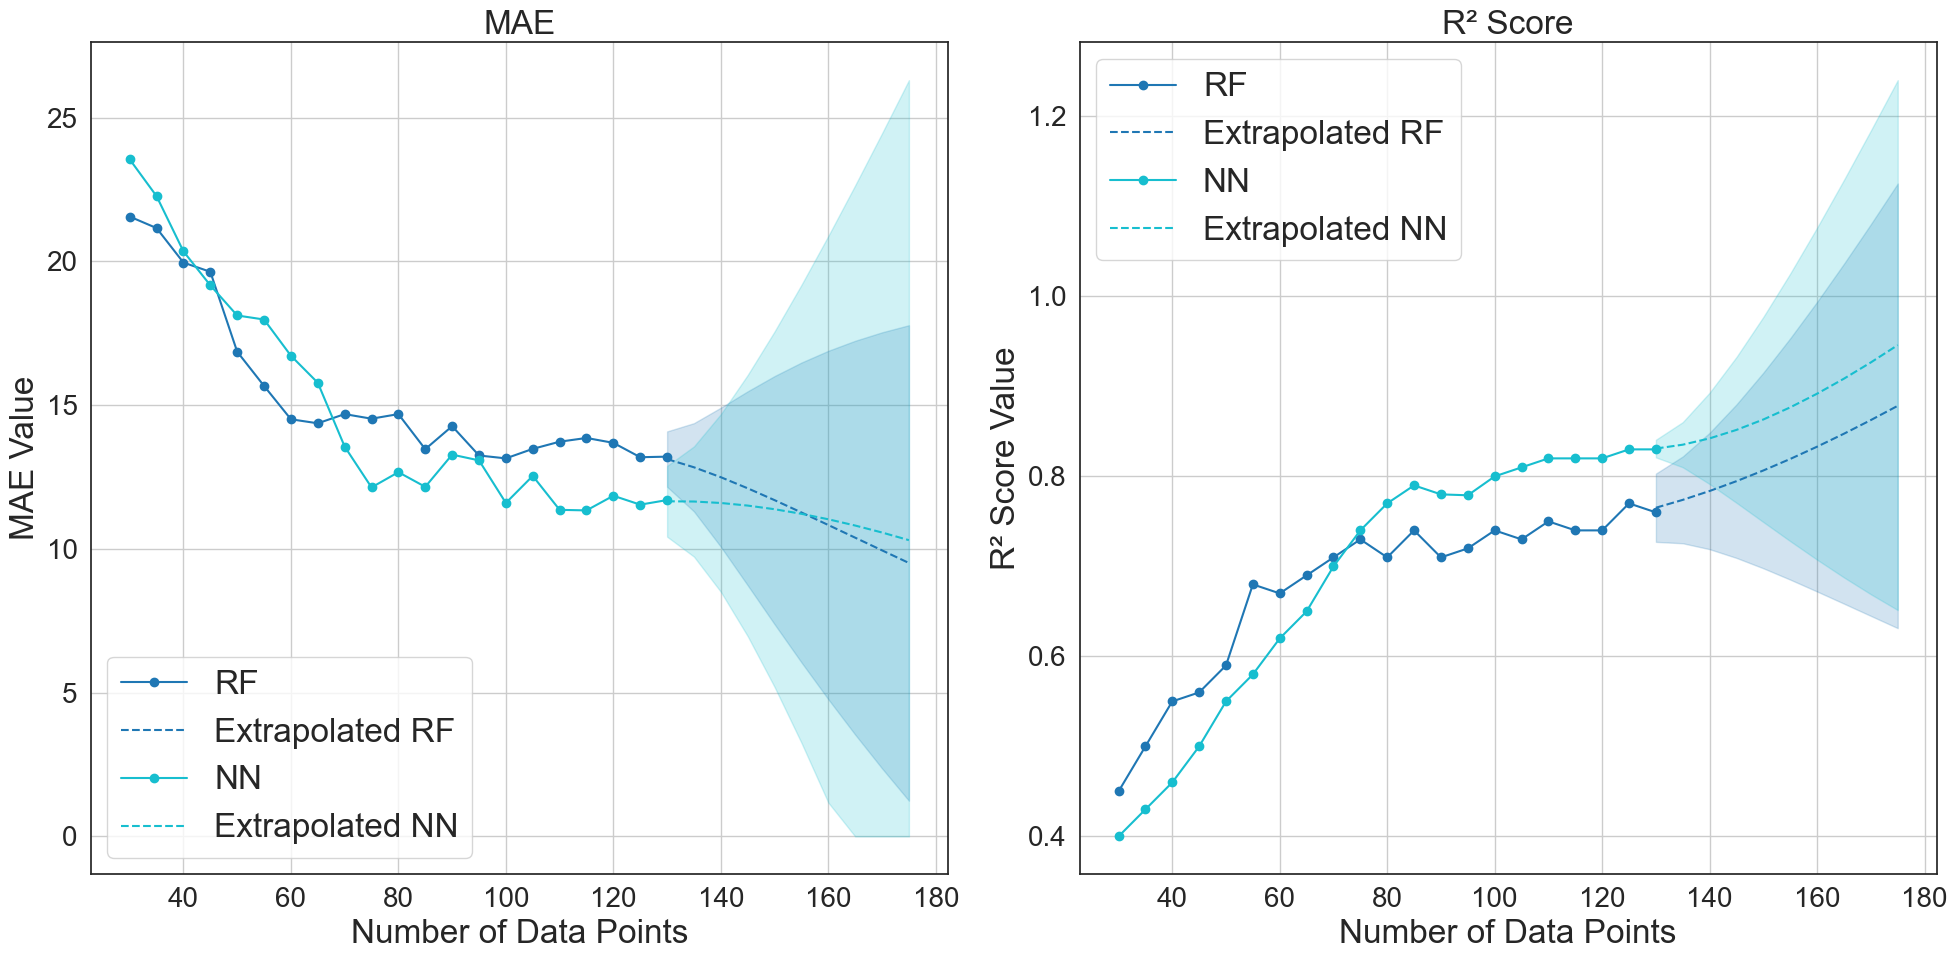

In [13]:

def plot_metrics_separately(models, data_points, metrics, metric_names, extrapolate_points):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Also extrapolates these metrics for additional data points.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.

    """

    # Set the style
    sns.set_theme(style="white")

     # Plot heatmap
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
                        'axes.titlesize': 24,
                        'axes.labelsize': 24,
                        'xtick.labelsize': 20,
                        'ytick.labelsize': 20,
                        'legend.fontsize': 24,
                        'font.size': 20
                    })
    
    # Create a figure to plot
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))

    # Iterate over each metric and create a separate plot for each
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        # Use a different color for each model
        colors = plt.cm.get_cmap('tab10', len(models))
        
        # Iterate over each model and plot their respective metrics
        for j, model in enumerate(models):
            # Plot the actual data points for this model and metric
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Extrapolate the metric data using linear regression
            X = np.array(data_points).reshape(-1, 1)
            y = np.array(metric[j])

            # Apply linear regression for extrapolation
            reg_model = LinearRegression()
            reg_model.fit(X, y)
            

            # Create additional points for extrapolation
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 10, step=10)
            X_new = new_data_points.reshape(-1, 1)
            y_new = reg_model.predict(X_new)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")

        ax.legend()
        ax.grid(True)
    
    
    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

def plot_metrics_separately_gpr(models, data_points, metrics, metric_names, extrapolate_points):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Uses Gaussian Process Regression (GPR) for extrapolation with an improved kernel.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.
    """
    # Set the style
    sns.set_theme(style="white")
    
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
        'axes.titlesize': 24,
        'axes.labelsize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 24,
        'font.size': 20
    })
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        colors = plt.cm.get_cmap('tab10', len(models))
        
        for j, model in enumerate(models):
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Fit a Gaussian Process model with a better kernel
            X = np.array(data_points).reshape(-1, 1)
            y = np.array(metric[j])
            kernel = C(1.0) * Matern(length_scale=5.0) + DotProduct() + WhiteKernel()
            gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-6)
            gpr.fit(X, y)
            
            # Extrapolate using GPR
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 5, step=5)
            X_new = new_data_points.reshape(-1, 1)
            y_new, sigma = gpr.predict(X_new, return_std=True)
            
            # Ensure extrapolated values stay realistic
            y_new = np.maximum(y_new, 0)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")
            ax.fill_between(new_data_points, np.maximum(y_new - 1.96 * sigma, 0), y_new + 1.96 * sigma, color=colors(j), alpha=0.2)
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_metrics_separately_poly(models, data_points, metrics, metric_names, extrapolate_points, degree=3):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Uses Polynomial Regression for extrapolation.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.
    degree (int): Degree of the polynomial for extrapolation.
    """
    # Set the style
    sns.set_theme(style="white")
    
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
        'axes.titlesize': 24,
        'axes.labelsize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 24,
        'font.size': 20
    })
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        colors = plt.cm.get_cmap('tab10', len(models))
        
        for j, model in enumerate(models):
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Fit a polynomial regression model
            X = np.array(data_points)
            y = np.array(metric[j])
            coefs = Polynomial.fit(X, y, deg=degree).convert().coef
            poly = Polynomial(coefs)
            
            # Extrapolate using polynomial regression
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 10, step=10)
            y_new = poly(new_data_points)
            
            # Ensure extrapolated values stay realistic
            y_new = np.maximum(y_new, 0)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def exponential_smoothing(data, alpha):
    """
    Applies exponential smoothing to a given data series.
    
    Parameters:
    data (list or np.array): Input data series.
    alpha (float): Smoothing factor (0 < alpha ≤ 1). Higher values give more weight to recent data.
    
    Returns:
    np.array: Smoothed data series.
    """
    smoothed = [data[0]]  # Initialize with the first value
    for t in range(1, len(data)):
        smoothed.append(alpha * data[t] + (1 - alpha) * smoothed[t - 1])
    return np.array(smoothed)

def plot_metrics_separately_exp(models, data_points, metrics, metric_names, extrapolate_points, alpha=0.5):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Uses Exponential Smoothing for extrapolation.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.
    alpha (float): Smoothing factor for exponential smoothing.
    """
    # Set the style
    sns.set_theme(style="white")
    
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
        'axes.titlesize': 24,
        'axes.labelsize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 24,
        'font.size': 20
    })
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        colors = plt.cm.get_cmap('tab10', len(models))
        
        for j, model in enumerate(models):
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Apply exponential smoothing
            smoothed_data = exponential_smoothing(metric[j], alpha)
            
            # Extrapolate using last smoothed value (assumption of stationarity)
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 10, step=10)
            y_new = np.full_like(new_data_points, smoothed_data[-1], dtype=np.float64)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def train_random_forest(X, y, n_estimators=100):
    """
    Trains a Random Forest regressor for extrapolation.
    
    Parameters:
    X (np.array): Input data points.
    y (np.array): Corresponding metric values.
    n_estimators (int): Number of trees in the forest.
    
    Returns:
    model: Trained Random Forest model.
    """
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X.reshape(-1, 1), y)
    return model

def plot_metrics_separately_rf(models, data_points, metrics, metric_names, extrapolate_points, n_estimators=20):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Uses a Random Forest Regressor for extrapolation.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.
    n_estimators (int): Number of trees in the Random Forest.
    """
    # Set the style
    sns.set_theme(style="white")
    
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
        'axes.titlesize': 24,
        'axes.labelsize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 24,
        'font.size': 20
    })
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        colors = plt.cm.get_cmap('tab10', len(models))
        
        for j, model in enumerate(models):
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Train a Random Forest model for extrapolation
            X = np.array(data_points)
            y = np.array(metric[j])
            rf_model = train_random_forest(X, y, n_estimators)
            
            # Extrapolate using the trained model
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 10, step=10)
            y_new = rf_model.predict(new_data_points.reshape(-1, 1))
            
            # Ensure extrapolated values stay realistic
            y_new = np.maximum(y_new, 0)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the performance and extrapolated lines separately for each metric
plot_metrics_separately_gpr(models, data_points, metrics, metric_names, extrapolate_points=10)

In [14]:


def train_neural_network(X, y, epochs=500, lr=0.01):
    """
    Trains a simple neural network for extrapolation using PyTorch.
    
    Parameters:
    X (np.array): Input data points.
    y (np.array): Corresponding metric values.
    epochs (int): Number of training epochs.
    lr (float): Learning rate for the optimizer.
    
    Returns:
    model: Trained PyTorch neural network model.
    """
    X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    class NeuralNet(nn.Module):
        def __init__(self):
            super(NeuralNet, self).__init__()
            self.fc1 = nn.Linear(1, 64)
            self.fc2 = nn.Linear(64, 64)
            self.fc3 = nn.Linear(64, 1)
        
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = torch.relu(self.fc2(x))
            x = self.fc3(x)
            return x
    
    model = NeuralNet()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor)
        loss = loss_fn(y_pred, y_tensor)
        loss.backward()
        optimizer.step()
    
    return model

def plot_metrics_separately_nn(models, data_points, metrics, metric_names, extrapolate_points, epochs=500, lr=0.01):
    """
    Plots separate graphs for each error metric (MAE, R², NLL) as a function of increasing data points.
    Uses a Neural Network (PyTorch) for extrapolation.

    Parameters:
    models (list): List of model names.
    data_points (list): List of numbers representing the data points (e.g., [10, 20, 30, ...]).
    metrics (list of lists): A list of metric values for each model, where each list corresponds to a model.
    metric_names (list): Names of the metrics (e.g., ['MAE', 'R²', 'NLL']).
    extrapolate_points (int): Number of additional data points to extrapolate.
    epochs (int): Number of training epochs for the neural network.
    lr (float): Learning rate for training.
    """
    # Set the style
    sns.set_theme(style="white")
    
    plt.figure(figsize=(14, 12))
    plt.rcParams.update({
        'axes.titlesize': 24,
        'axes.labelsize': 24,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 24,
        'font.size': 20
    })
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 10))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.set_title(f"{metric_names[i]}")
        ax.set_xlabel("Number of Data Points")
        ax.set_ylabel(f"{metric_names[i]} Value")
        
        colors = plt.cm.get_cmap('tab10', len(models))
        
        for j, model in enumerate(models):
            ax.plot(data_points, metric[j], label=f"{model}", color=colors(j), marker='o')
            
            # Train a neural network for extrapolation
            X = np.array(data_points)
            y = np.array(metric[j])
            nn_model = train_neural_network(X, y, epochs, lr)
            
            # Extrapolate using the trained neural network
            new_data_points = np.arange(data_points[-1], data_points[-1] + extrapolate_points * 10, step=10)
            X_new = torch.tensor(new_data_points, dtype=torch.float32).unsqueeze(1)
            y_new = nn_model(X_new).detach().numpy().flatten()
            
            # Ensure extrapolated values stay realistic
            y_new = np.maximum(y_new, 0)
            
            # Plot the extrapolated data
            ax.plot(new_data_points, y_new, linestyle='--', color=colors(j), label=f"Extrapolated {model}")
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_19252\3279062850.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))
C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_19252\3279062850.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))


<Figure size 1400x1200 with 0 Axes>

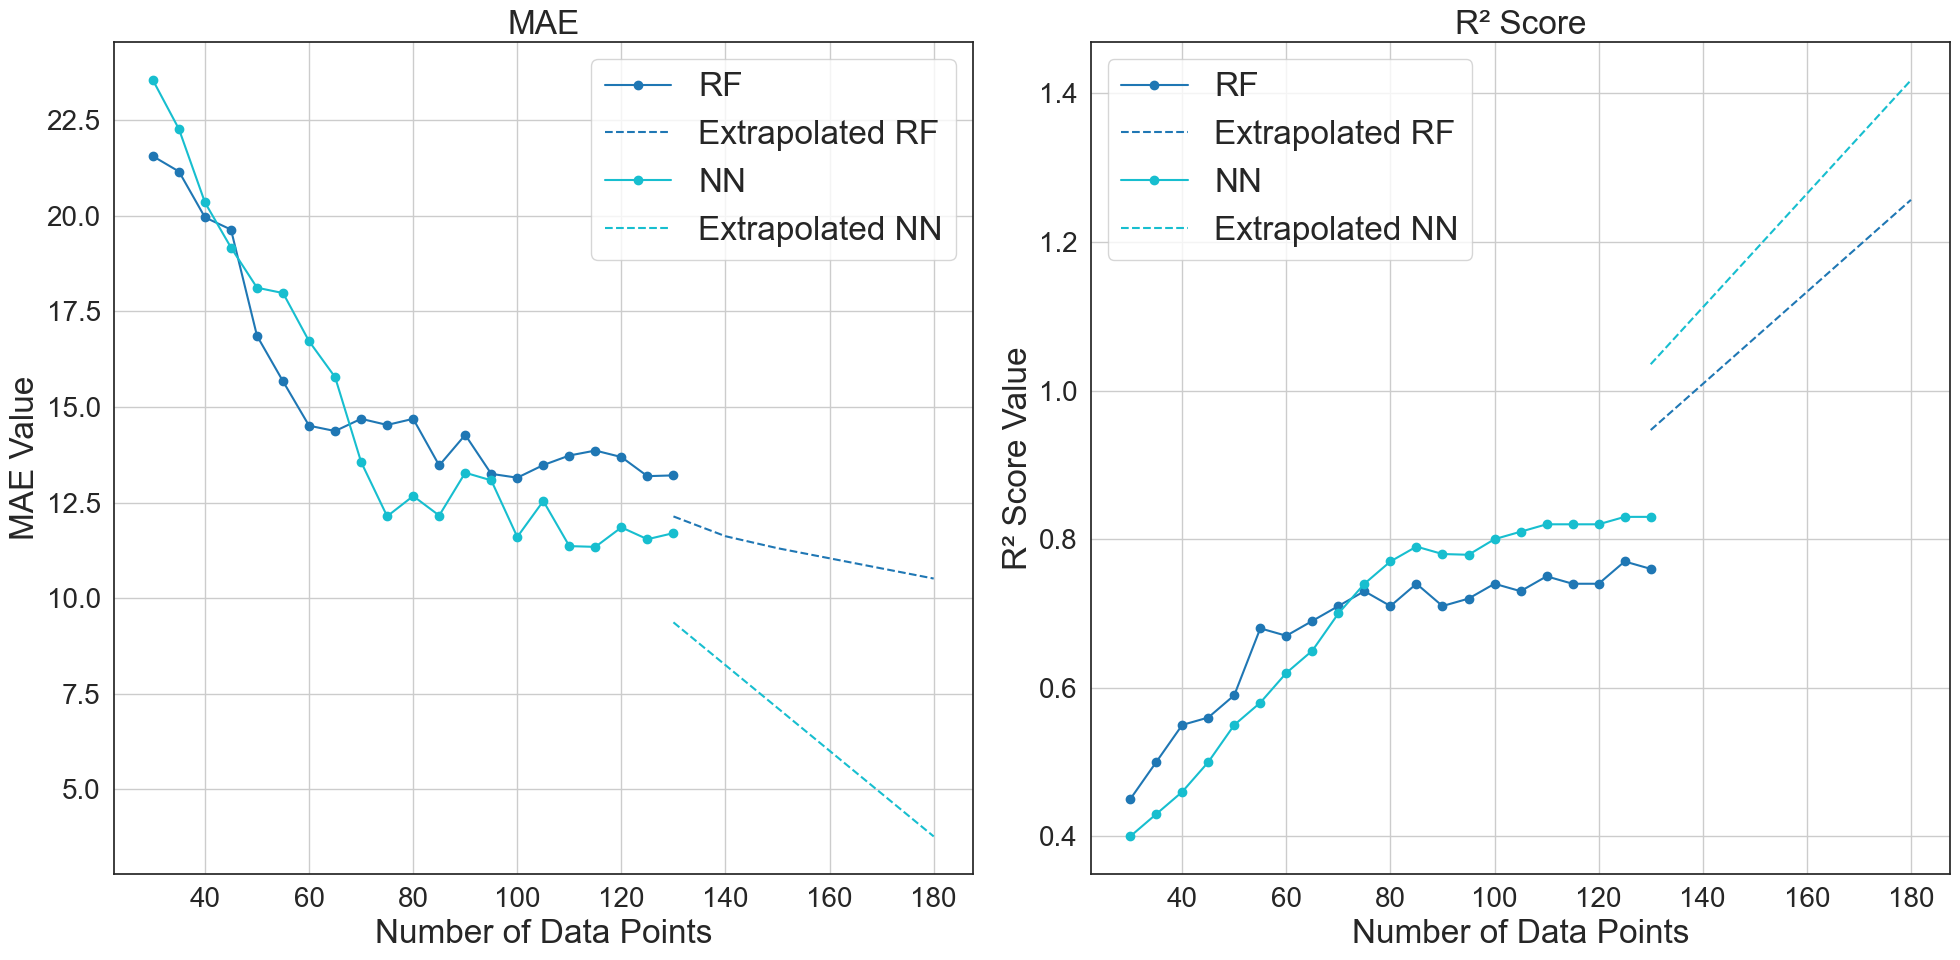

In [15]:
# Call the function to plot the performance and extrapolated lines separately for each metric
plot_metrics_separately_nn(models, data_points, metrics, metric_names, extrapolate_points=6)